In [29]:
# Importing necessary libraries
import warnings
import pandas as pd
import seaborn as sns
import _pickle as cPickle
from imblearn.over_sampling import SMOTE

In [30]:
# Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [2]:
# Importing our defined classes from utils.py
from utils import AnalyserUtil
from utils import FeatureEngineeringUtil
from utils import ModelUtil

In [3]:
# Initial adjustments
warnings.simplefilter(action='ignore',category=Warning)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style('darkgrid')

In [4]:
# Loading dataset and declaring analyser & feateng
df = pd.read_csv("data.csv")
analyser = AnalyserUtil()
feateng = FeatureEngineeringUtil()

## EDA & Some Cleaning Processes

In [5]:
# Big picture
analyser.check_df(df,2,2)

************************* COLUMNS **************************
Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
*************************** INFO ***************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non

In [6]:
# Making column names lower
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'customerid', 'surname', 'creditscore', 'geography', 'gender',
       'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [7]:
# Dropping redundant columns
df.drop(["id","customerid","surname"],axis=1,inplace=True)

In [8]:
# Big picture again
analyser.check_df(df)

************************* COLUMNS **************************
Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited'],
      dtype='object')
*************************** INFO ***************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   creditscore      165034 non-null  int64  
 1   geography        165034 non-null  object 
 2   gender           165034 non-null  object 
 3   age              165034 non-null  float64
 4   tenure           165034 non-null  int64  
 5   balance          165034 non-null  float64
 6   numofproducts    165034 non-null  int64  
 7   hascrcard        165034 non-null  float64
 8   isactivemember   165034 non-null  float64
 9   estimatedsalary  165034 non-null  float64
 10  exited     

In [9]:
# Detecting duplicated rows
df[df.duplicated(keep=False)].sort_values(by="creditscore")

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
29571,405,France,Male,39.00,10,0.00,1,1.00,1.00,160810.85,0
51518,405,France,Male,39.00,10,0.00,1,1.00,1.00,160810.85,0
20378,449,Spain,Female,33.00,8,0.00,2,1.00,0.00,156792.89,0
21512,449,Spain,Female,33.00,8,0.00,2,1.00,0.00,156792.89,0
147253,457,France,Female,38.00,7,164496.99,1,1.00,1.00,163327.27,0
...,...,...,...,...,...,...,...,...,...,...,...
25905,850,France,Female,35.00,5,0.00,2,1.00,1.00,51919.04,0
110437,850,France,Male,34.00,7,0.00,2,1.00,1.00,171706.66,0
129886,850,France,Male,35.00,6,124788.18,1,1.00,0.00,65612.12,0
103051,850,France,Male,34.00,7,0.00,2,1.00,1.00,171706.66,0


In [10]:
# Dropping them by keeping first
df.drop_duplicates(inplace=True)

In [11]:
# Checking them again
df[df.duplicated(keep=False)].sort_values(by="creditscore")

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited


In [12]:
# Grabbing columns with summary
_,num,cat = feateng.grabbing_vars(df,cat_num_th=3,summary=True)

************************* SUMMARY **************************
# of object variables: 0
[]
# of numeric variables: 6
['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']
# of categoric variables: 5
['geography', 'gender', 'hascrcard', 'isactivemember', 'exited']


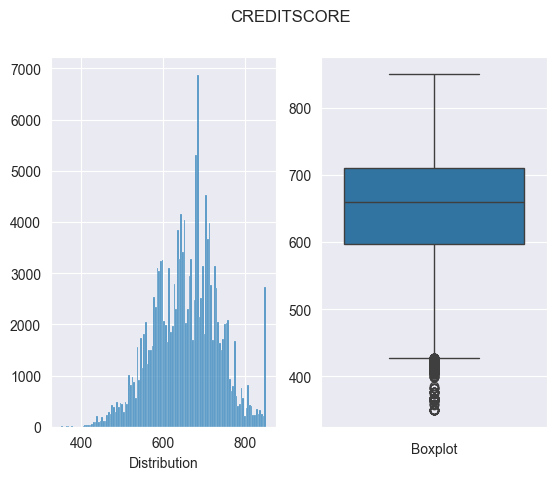

exited
0   657.61
1   652.21
Name: creditscore, dtype: float64


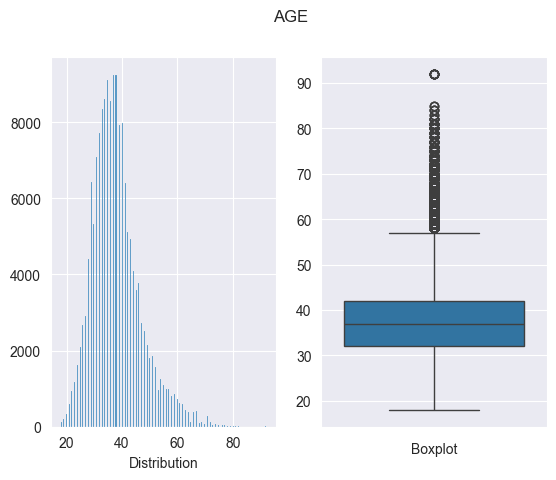

exited
0   36.56
1   43.96
Name: age, dtype: float64


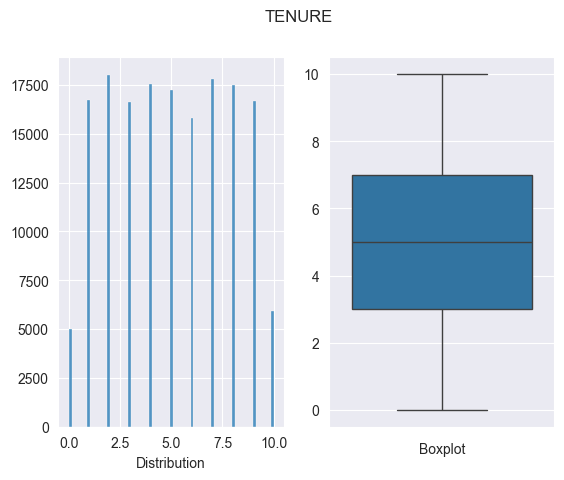

exited
0   5.05
1   4.91
Name: tenure, dtype: float64


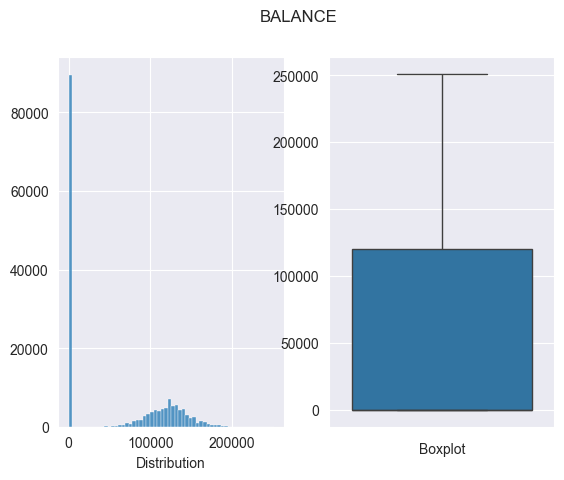

exited
0   51260.08
1   71200.48
Name: balance, dtype: float64


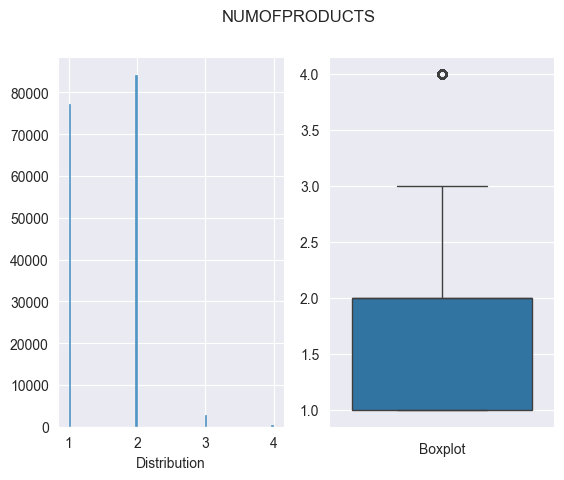

exited
0   1.62
1   1.33
Name: numofproducts, dtype: float64


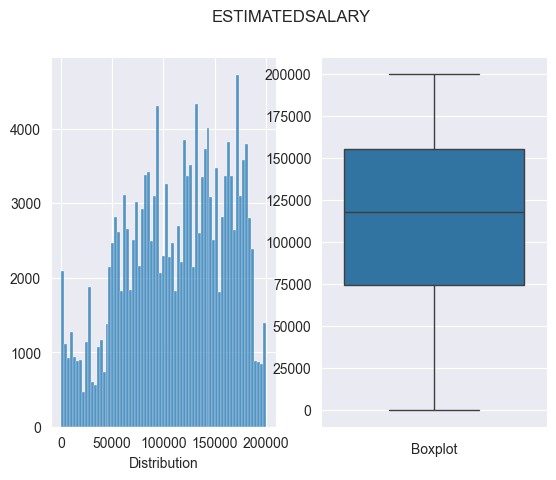

exited
0   112091.90
1   114396.73
Name: estimatedsalary, dtype: float64


In [13]:
# Numerical variables analysis
for col in num:
    analyser.num_summary(df,col)

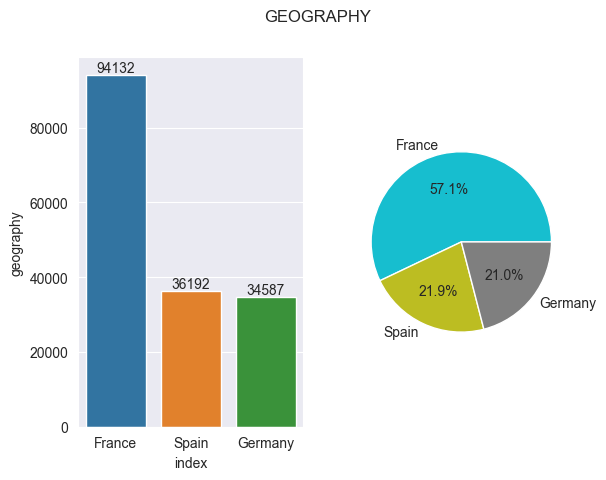

geography
France    0.17
Germany   0.38
Spain     0.17
Name: exited, dtype: float64


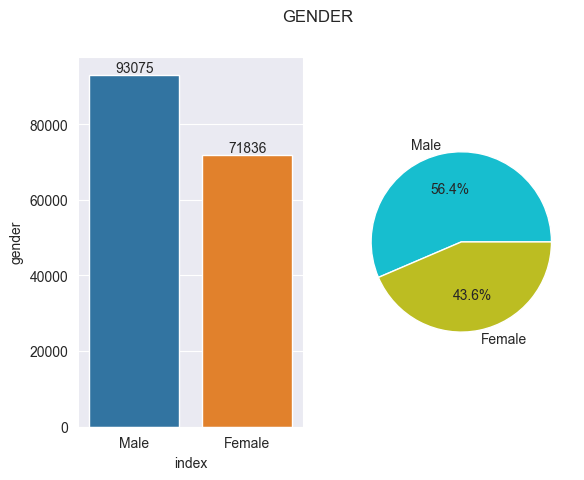

gender
Female   0.28
Male     0.16
Name: exited, dtype: float64


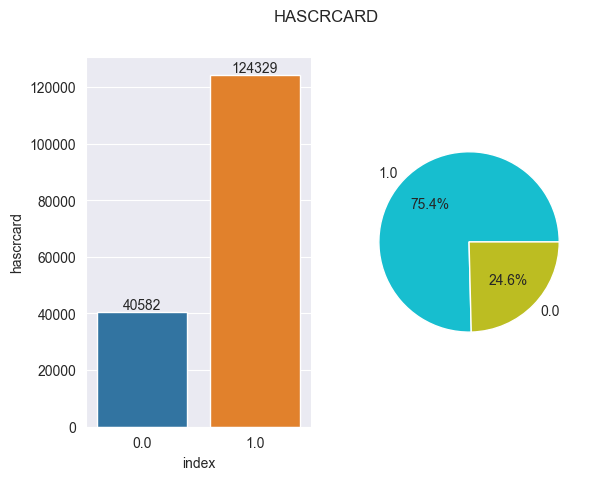

hascrcard
0.00   0.23
1.00   0.21
Name: exited, dtype: float64


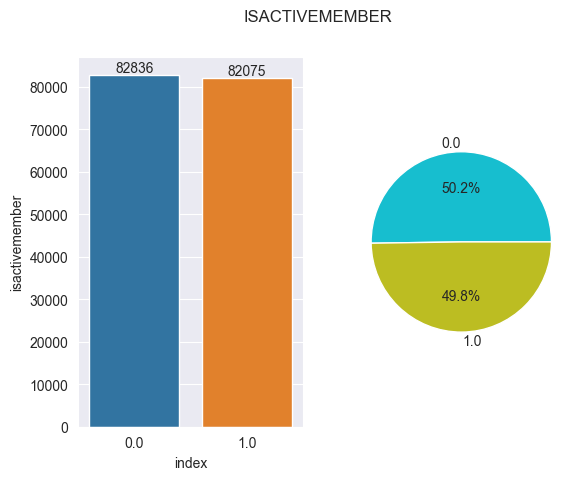

isactivemember
0.00   0.30
1.00   0.13
Name: exited, dtype: float64


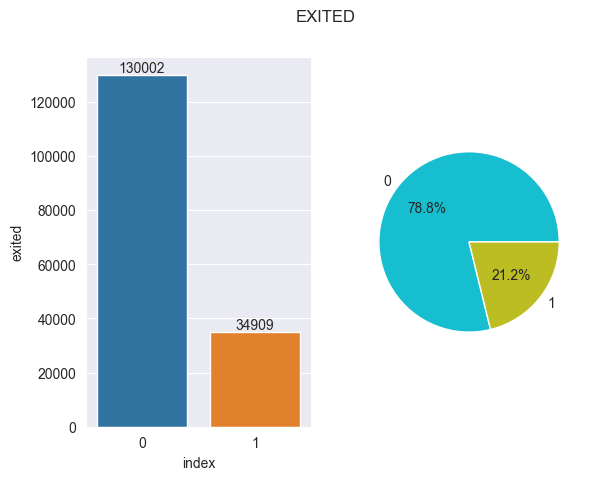

In [14]:
# Categorical variables analysis
for col in cat:
    analyser.cat_summary(df,col)

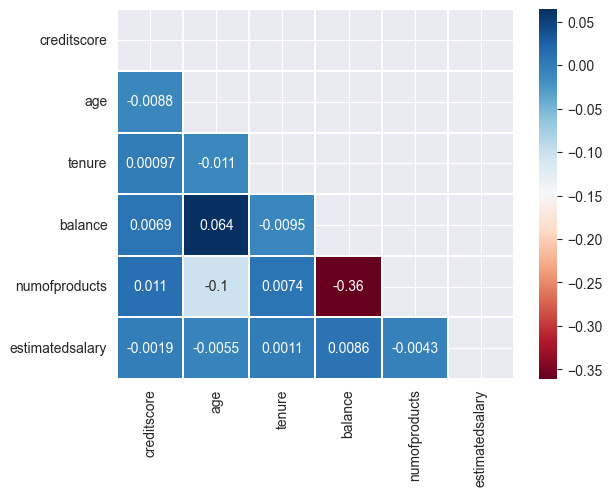

In [15]:
# Correlation analysis 
analyser.correlation_matrix(df,num)

## Feature Engineering & Solving Imbalancing

In [17]:
# Saving dataframe to use later in app.py
df.to_csv("before_fteng_data.csv")

In [18]:
# Getting dependent and independent dataframes with feateng
X, Y = feateng.churn_prep(df)

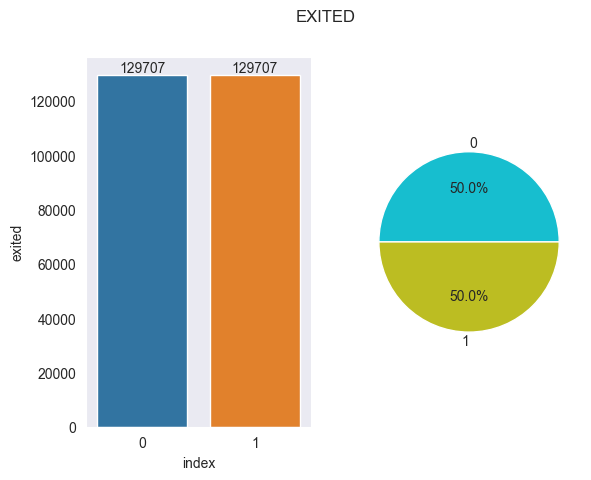

In [27]:
# Solving imbalanced data problem with Synthetic Minority Oversampling Technique (SMOTE)
ros = SMOTE()
X_overs, Y_overs = ros.fit_resample(X,Y)
analyser.cat_summary(pd.DataFrame(Y_overs),"exited")

## Model Preparation

In [20]:
# Declaring modeler
modeler = ModelUtil()

In [39]:
model = XGBClassifier(verbosity=0)

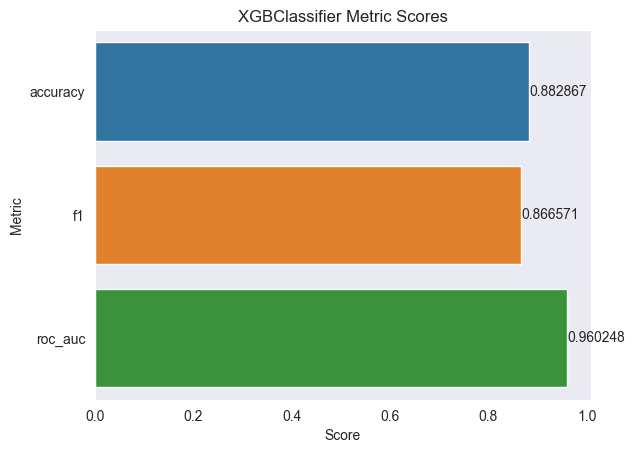

In [40]:
modeler.model_metrics_summary(model,X_overs,Y_overs)

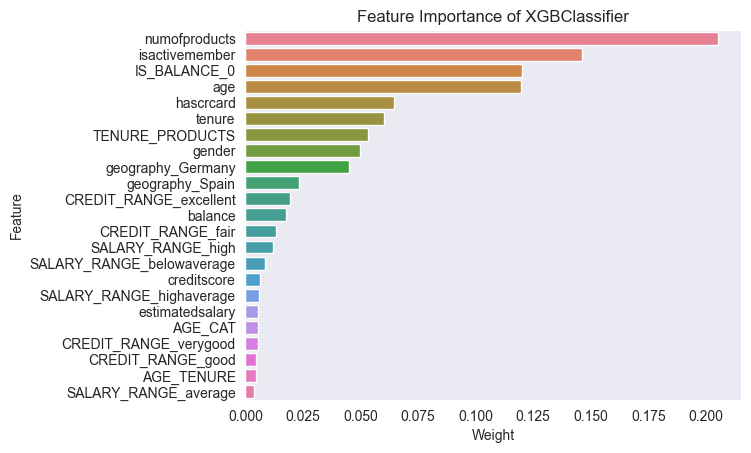

In [42]:
model.fit(X_overs,Y_overs)
modeler.feature_importance_plot(model,X_overs,X_overs.shape[1])

In [43]:
cPickle.dump(model,open("XGBModel.pkl","wb"))